In [1]:
import numpy as np
import math
from osgeo import gdal, ogr, osr, gdal_array
import os
import random
import matplotlib.pyplot as plt

In [2]:
R = 10

arr1 = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr1.shape[0]
ncols = arr1.shape[1]
arr1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [3]:
ncols

21

In [4]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr1[x][y] = z
        except ValueError:
            pass

#arr1
print(np.array_str(arr1, precision=1))

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.7  3.2  3.9  4.2  4.4  4.2  3.9  3.2
   1.7  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   3.3  4.5  5.2  5.7  5.9  6.   5.9  5.7  5.2
   4.5  3.3  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.4  3.9  5.1  5.9  6.5  6.9  7.1  7.1  7.1  6.9  6.5
   5.9  5.1  3.9  1.4  0.   0.   0. ]
 [ 0.   0.   0.   3.9  5.3  6.2  6.9  7.4  7.7  7.9  8.   7.9  7.7  7.4
   6.9  6.2  5.3  3.9  0.   0.   0. ]
 [ 0.   0.   3.3  5.1  6.2  7.1  7.7  8.1  8.4  8.6  8.7  8.6  8.4  8.1
   7.7  7.1  6.2  5.1  3.3  0.   0. ]
 [ 0.   1.7  4.5  5.9  6.9  7.7  8.2  8.7  8.9  9.1  9.2  9.1  8.9  8.7
   8.2  7.7  6.9  5.9  4.5  1.7  0. ]
 [ 0.   3.2  5.2  6.5  7.4  8.1  8.7  9.1  9.3  9.5  9.5  9.5  9.3  9.1
   8.7  8.1  7.4  6.5  5.2  3.2  0. ]
 [ 0.   3.9  5.7  6.9  7.7  8.4  8.9  9.3  9.6  9.7  9.8  9.7  9.6  9.3
   8.9  8.4  7.7  6.9  5.7  3.9  0. ]
 [ 0.   4.2

In [5]:
print(np.max(arr1), np.min(arr1))

10.0 0.0


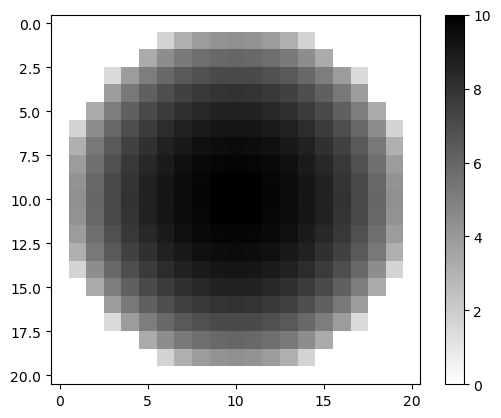

In [6]:
plt.imshow(arr1, cmap='binary')
plt.colorbar()
plt.show()

In [7]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemisphere_10_orig.tif', ncols, ncols, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr1)
# gtiff.FlushCache()
gtiff = None

In [8]:
arr1[0][0]

arr2 = np.copy(arr1)

In [9]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_k = arr1 + arr_n
arr_k

array([[ 5.51316275e-01, -1.74747749e+00,  1.70332988e+00,
         6.39515654e-01, -9.44610044e-01, -1.69001918e+00,
         1.99625698e-02, -6.33316207e-01,  1.85550245e+00,
         8.55099480e-01,  7.82499803e-01,  4.28694116e-01,
         1.50140584e-01, -2.22533757e-01, -1.16801409e-01,
        -1.26799893e+00,  1.13976138e+00,  5.26468553e-01,
         3.21833779e-01,  2.86655037e-01,  3.57179066e-01],
       [-7.71906812e-01,  1.47268319e+00,  9.25789353e-01,
         6.03558136e-01,  1.94893255e+00, -6.20312564e-01,
         3.91500898e+00,  2.94052578e+00,  3.51795064e+00,
         5.36385646e+00,  4.04672184e+00,  3.53656726e+00,
         3.96531270e+00,  3.95536969e+00,  2.20668546e+00,
         7.97936832e-01, -1.80465385e+00,  4.06505496e-01,
         7.94237268e-01, -1.17322166e+00,  1.31116113e+00],
       [-1.09536346e+00, -2.90243141e-02,  2.97282641e-02,
        -4.55975343e-01, -2.91061716e-01,  2.32348069e+00,
         5.17838068e+00,  5.34634833e+00,  5.26852496e

In [12]:
#fig, ax = plt.subplots(1, 3)
#ax[0].contour(arr1)
#ax[1].contour(arr_n)
#ax[2].contour(arr_k)
#plt.show()

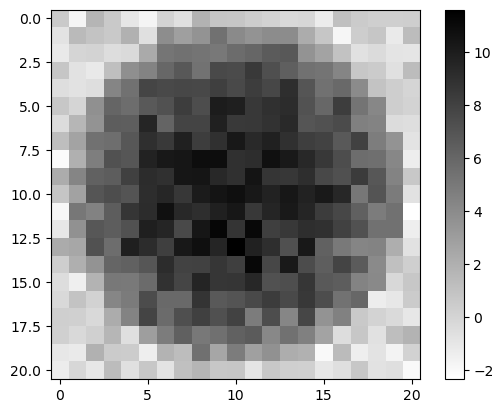

In [10]:
plt.imshow(arr_k, cmap='binary')
plt.colorbar()
plt.show()

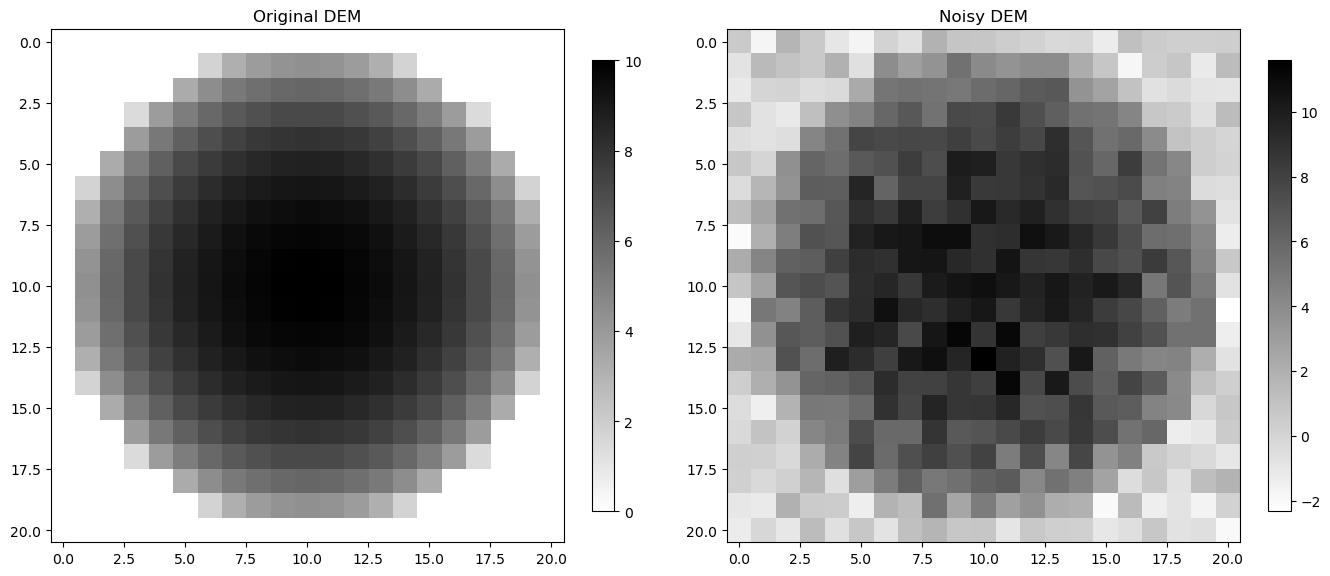

In [22]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM')
plt.imshow(arr1, cmap='binary')
plt.colorbar(fraction=0.04)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM')
plt.imshow(arr_k, cmap='binary')
plt.colorbar(fraction=0.04)
plt.show()

In [14]:
#difference (clear-noisy)
np.subtract(arr1, arr_k)

array([[-0.03418318,  1.50444564,  0.74408081,  1.0388193 ,  1.62338547,
         1.16490934,  0.83187365, -0.55973316,  0.12981737, -0.33466711,
        -1.51222578,  0.82197676, -1.23098675, -0.95012605, -1.29226107,
        -0.20401324,  0.57101096, -0.05234467, -0.89636901, -0.93299757,
        -0.65472732],
       [-0.45496046,  0.86629585, -1.28235682,  1.90546435, -0.12408753,
        -0.69861466,  0.64861617, -1.88489054, -0.74269167,  0.73931724,
         0.49294447,  1.12829896, -0.82297137,  0.76412367,  1.3258852 ,
        -0.51164287,  0.42696914,  0.16591125, -2.06184442,  0.3107672 ,
         2.54228387],
       [ 0.90423804,  0.35600688,  0.57148356,  1.87709779,  1.7587949 ,
         0.45849109, -2.14883473,  2.34609303,  0.19756616,  0.97541463,
        -0.12915234,  0.06860386,  1.59905547,  0.57292818,  0.76173811,
        -0.20696108,  0.68315605,  0.32344099,  0.43248667, -0.64530606,
         0.16422154],
       [ 0.34781577,  1.02130833, -0.21910569, -2.25732866

In [27]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemisphere_10_noisy.tif', ncols, ncols, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr_k)
# gtiff.FlushCache()
gtiff = None

In [19]:
#hemicylinder
R = 10

arr_c = np.zeros((int(4*R), int(2*R)+1), dtype = 'float')
nrows = arr_c.shape[0]
ncols = arr_c.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_c[x][y] = z
        except ValueError:
            pass

arr_c

array([[ 0.        ,  4.35889894,  6.        ,  7.14142843,  8.        ,
         8.66025404,  9.16515139,  9.53939201,  9.79795897,  9.94987437,
        10.        ,  9.94987437,  9.79795897,  9.53939201,  9.16515139,
         8.66025404,  8.        ,  7.14142843,  6.        ,  4.35889894,
         0.        ],
       [ 0.        ,  4.35889894,  6.        ,  7.14142843,  8.        ,
         8.66025404,  9.16515139,  9.53939201,  9.79795897,  9.94987437,
        10.        ,  9.94987437,  9.79795897,  9.53939201,  9.16515139,
         8.66025404,  8.        ,  7.14142843,  6.        ,  4.35889894,
         0.        ],
       [ 0.        ,  4.35889894,  6.        ,  7.14142843,  8.        ,
         8.66025404,  9.16515139,  9.53939201,  9.79795897,  9.94987437,
        10.        ,  9.94987437,  9.79795897,  9.53939201,  9.16515139,
         8.66025404,  8.        ,  7.14142843,  6.        ,  4.35889894,
         0.        ],
       [ 0.        ,  4.35889894,  6.        ,  7.14142843

In [20]:
np.max(arr_c)

10.0

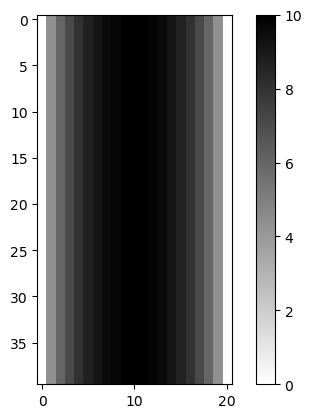

In [21]:
plt.imshow(arr_c, cmap='binary')
plt.colorbar()
plt.show()

In [20]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemicylinder_test.tif', ncols, nrows, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr_c)
# gtiff.FlushCache()
gtiff = None